In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold, LeaveOneOut, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

/home/adebisi/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df = pd.read_csv('Data_for_UCI_named.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [3]:
#Drop stab column
df.drop(columns='stab', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stabf   10000 non-null  object 
dtypes: float64(12), object(1)
memory usage: 1015.8+ KB


In [4]:
#Split X and y
y = df['stabf']
X = df.drop('stabf', axis=1)
X

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391


In [5]:
y.value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [6]:
y

0       unstable
1         stable
2       unstable
3       unstable
4       unstable
          ...   
9995    unstable
9996      stable
9997      stable
9998    unstable
9999    unstable
Name: stabf, Length: 10000, dtype: object

In [7]:
#First, encode categorical variables.
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([1, 0, 1, ..., 0, 1, 1])

unstable is coded as 1, stable as 0

In [8]:
#Split test and training data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 12) (2000, 12) (8000,) (2000,)


In [9]:
#Use SMOTE to handle imbalance in training data
smote = SMOTE(random_state=1)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

In [10]:
#Standard scaler to transform X_train, X_test, y_train
#Normalize X_train
scaler = StandardScaler()
norma_X_train = scaler.fit_transform(X_train_bal)
norma_X_train_df = pd.DataFrame(norma_X_train, columns = X_train_bal.columns)

#Normalize X_test
X_test = X_test.reset_index(drop=True)
norma_X_test = scaler.transform(X_test)
norma_X_test_df = pd.DataFrame(norma_X_test, columns = X_test.columns)

In [11]:
#Put models in a dictionary
models = {'randomforest': RandomForestClassifier(random_state=1),
          'extratree': ExtraTreeClassifier(random_state=1),
          'xgb': XGBClassifier(random_state=1),
          'lightgbm': LGBMClassifier(random_state=1)}

In [12]:
#Setting up a function to fit and score models
def fit_score(models, norma_X_train_df, norma_X_test_df, y_train_bal, y_test):
    #Create dict to keep model scores
    model_scores = {}
    #loop through models
    for name, model in models.items():
        model.fit(norma_X_train_df, y_train_bal)
        model_scores[name] = model.score(norma_X_test_df, y_test)
    return model_scores

In [13]:
model_scores = fit_score(models=models, norma_X_train_df=norma_X_train_df, norma_X_test_df=norma_X_test_df, y_train_bal=y_train_bal, y_test=y_test)
model_scores

/home/adebisi/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/adebisi/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17:22:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'randomforest': 0.918, 'extratree': 0.7305, 'xgb': 0.9415, 'lightgbm': 0.935}

In [ ]:
model_compare = pd.DataFrame(model_scores, index=['Accuracy'])
model_compare.T.plot.bar()

In [25]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.929

In [26]:
xg = XGBClassifier(random_state=1)
xg.fit(X_train, y_train)
xg.score(X_test, y_test)

/home/adebisi/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/adebisi/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17:52:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9455

In [27]:
lg = LGBMClassifier(random_state=1)
lg.fit(X_train, y_train)
lg.score(X_test, y_test)

0.939

In [28]:
xt = ExtraTreeClassifier(random_state=1)
xt.fit(X_train, y_train)
xt.score(X_test, y_test)

0.751

In [40]:
param_distributions = {
    'min_samples_split': [2, 5, 7],
    'min_samples_leaf': [4,6,8],
    'max_features': ['auto', 'log2', None]
}
rs_xt = RandomizedSearchCV(xt, param_distributions, cv=5, verbose=1, n_jobs=-1, n_iter=10, scoring='accuracy', random_state=1)
rs_xt.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=ExtraTreeClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'log2', None],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [2, 5, 7]},
                   random_state=1, scoring='accuracy', verbose=1)

In [39]:
ExtraTreeClassifier().get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [41]:
rs_xt.best_params_

{'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None}

 Question 18

Train a new ExtraTreesClassifier Model with the new Hyperparameters from the RandomizedSearchCV (with random_state = 1). Is the accuracy of the new optimal model higher or lower than the initial ExtraTreesClassifier model with no hyperparameter tuning?


In [46]:
xt2 = ExtraTreeClassifier(min_samples_split=2, min_samples_leaf=4, max_features=None,random_state=1)
xt2.fit(X_train, y_train)
xt2.score(X_test, y_test)

0.8235

In [42]:
rs_xt.score(X_test, y_test)

0.8235

 Question 20

Find the feature importance using the optimal ExtraTreesClassifier model. Which features are the most and least important respectively?


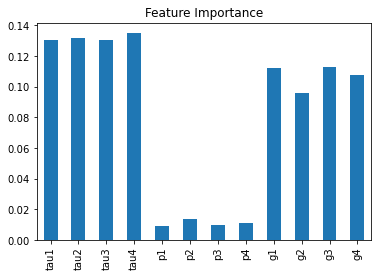

In [47]:
#Feature IMportance
features = X_train.columns
importances = xt2.feature_importances_
feat_imp = pd.Series(importances, index=features)
feat_imp.T.plot.bar(title='Feature Importance',legend=False);

In [ ]:
rs_xt